In [1]:
# Importing pandas library
import pandas as pd

In [2]:
# opening excel file by giving the sheet name.
df = pd.read_excel('GroceryStoreDataSet.xlsx',sheet_name='GroceryStoreDataSet',names=['products'],header=None)

In [3]:
# displaying 1st 5 rows
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [4]:
# splitting the products with the help of ,
data = list(df["products"].apply(lambda x:x.split(',')))

In [5]:
# using  TransactionEncoder from mlxtend library to convert the products into specific columns
from mlxtend.preprocessing import TransactionEncoder

In [6]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df.head()

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True


In [7]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
lb = LabelEncoder()
for i in df.columns:
    df[i]=lb.fit_transform(df[i],)
df.columns

Index(['BISCUIT', 'BOURNVITA', 'BREAD', 'COCK', 'COFFEE', 'CORNFLAKES', 'JAM',
       'MAGGI', 'MILK', 'SUGER', 'TEA'],
      dtype='object')

In [8]:
# df.plot.barh(figsize=(16,10))

In [9]:
from mlxtend.frequent_patterns import apriori

In [10]:
# using apriori algorithm to give the min support and use the column names.
df1 = apriori(df,min_support=0.01,use_colnames=True)
df1.head()

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)


In [11]:
# Sorting the items by their support value.
df1.sort_values(by="support",ascending=False).head()

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)


In [12]:
# sorting the elements by their length.
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1.head()

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1


<AxesSubplot:ylabel='itemsets'>

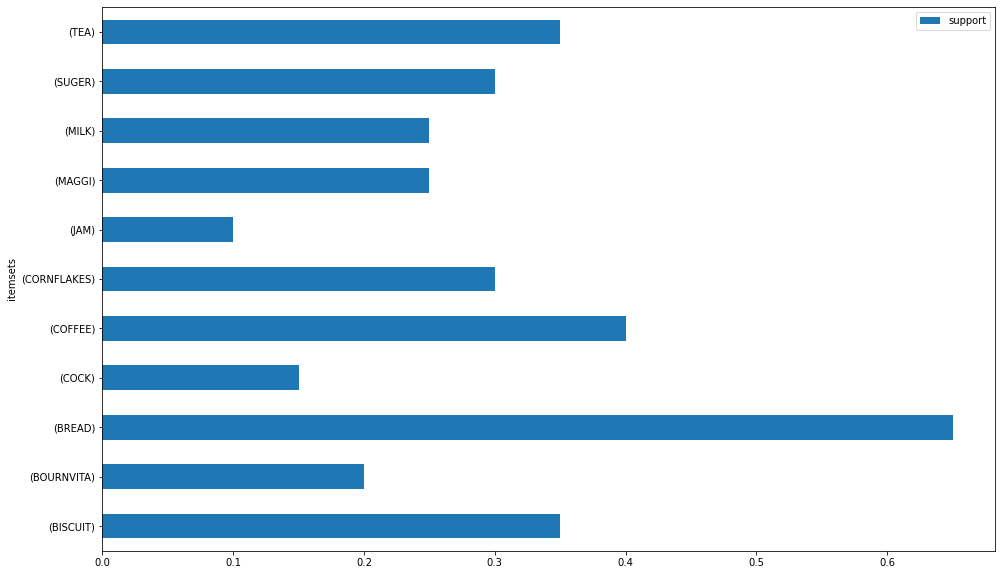

In [13]:
df1[df1["length"]==1].set_index("itemsets").plot.barh(y="support",figsize=(16,10))

In [14]:
# selecting the column whose count is greater than 0.05 and the length is 4
stored = df1[(df1['length']==4) & (df1['support']>=0.05)]

In [15]:
stored

,support,itemsets,length
77,0.05,"(BISCUIT, MILK, BREAD, CORNFLAKES)",4
78,0.05,"(BISCUIT, TEA, BREAD, MAGGI)",4
79,0.10,"(BISCUIT, CORNFLAKES, COCK, COFFEE)",4
80,0.05,"(MILK, BREAD, JAM, MAGGI)",4
81,0.05,"(TEA, BREAD, JAM, MAGGI)",4
82,0.05,"(CORNFLAKES, MILK, TEA, COFFEE)",4


In [16]:
# printing the max support value from the given table.
maximum_support=max(stored['support'])
print(maximum_support)

0.1


<AxesSubplot:ylabel='itemsets'>

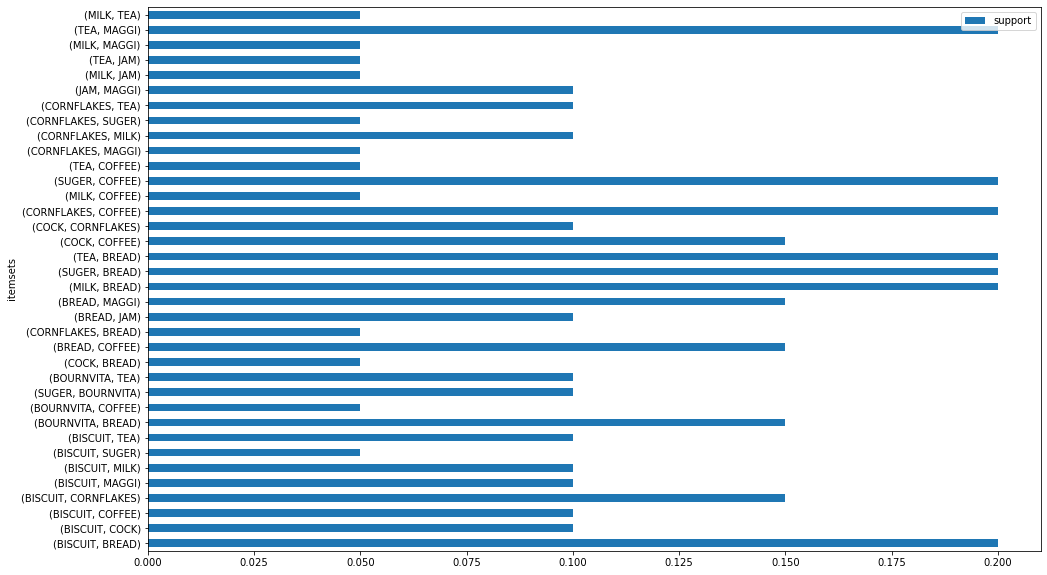

In [17]:
df1[(df1['length']==2) & (df1['support']>=0.05)].plot.barh(y="support",x="itemsets",figsize=(16,10))

<AxesSubplot:ylabel='itemsets'>

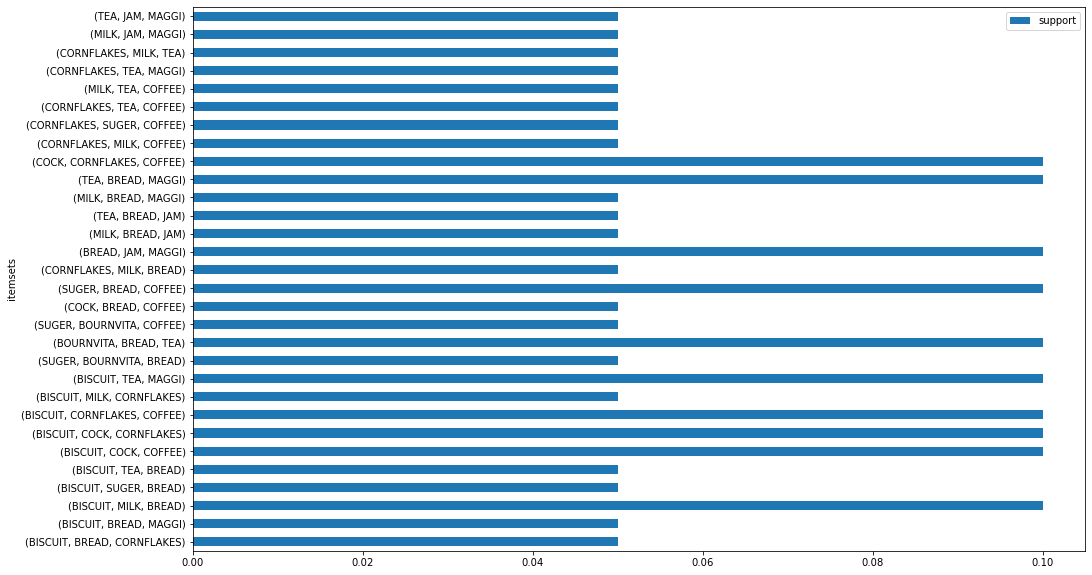

In [18]:
df1[(df1['length']==3) & (df1['support']>=0.05)].plot.barh(y="support",x="itemsets",figsize=(16,10))

<AxesSubplot:ylabel='itemsets'>

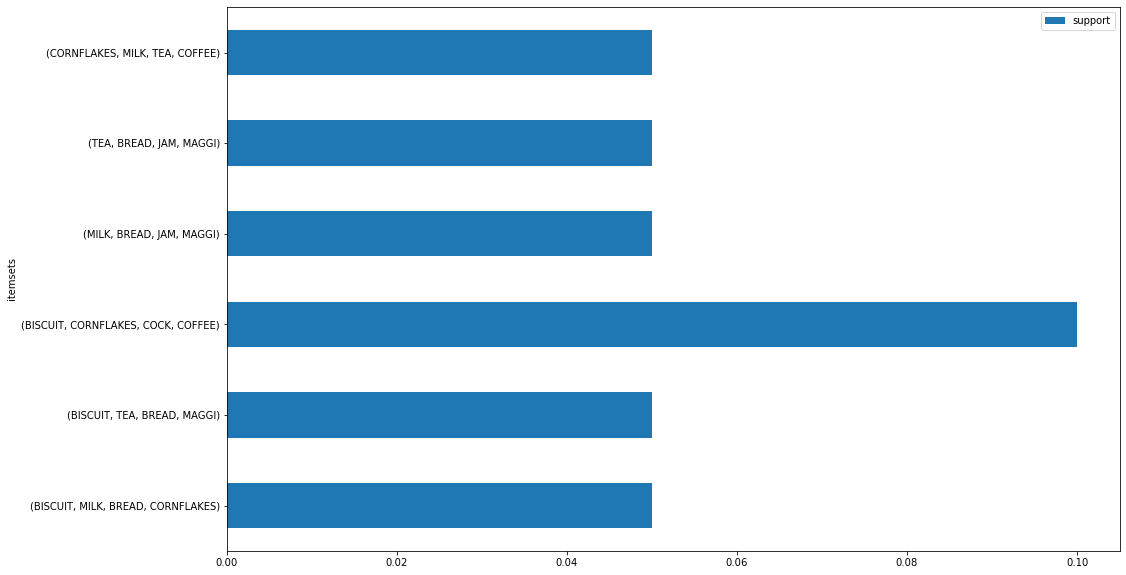

In [19]:
df1[(df1['length']==4) & (df1['support']>=0.05)].plot.barh(y="support",x="itemsets",figsize=(16,10))

In [20]:
# printing the result
df1[(df1['length']==4) & (df1['support']==maximum_support)]

,support,itemsets,length
79,0.1,"(BISCUIT, CORNFLAKES, COCK, COFFEE)",4
